In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATA PREPROCESSING

In [ ]:
# Put your paths here
#aaaaaaaaaa
TRAIN_PATH = '/content/drive/MyDrive/Machine learning/Train.csv'
TEST_PATH = '/content/drive/MyDrive/Machine learning/Test.csv'
SUB_PATH = '/content/drive/MyDrive/Machine learning/SampleSubmission.csv'

In [ ]:
np.random.seed(42)
np.random.RandomState(42)

RandomState(MT19937) at 0x7F9A7814CD10

In [ ]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(SUB_PATH)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          17761 non-null  int64  
 1   Order Status      17761 non-null  object 
 2   Category Name     9093 non-null   object 
 3   Product Name      17761 non-null  object 
 4   Quantity          17761 non-null  int64  
 5   Unit Price        17761 non-null  object 
 6   Total Price       17761 non-null  object 
 7   Sub Total         17245 non-null  object 
 8   Delivery Charge   17731 non-null  object 
 9   Payment Method    17326 non-null  object 
 10  Customer ID       17263 non-null  float64
 11  Merchant          17761 non-null  int64  
 12  Order Time        17761 non-null  object 
 13  Customer Country  17714 non-null  object 
 14  Purchase Again    17761 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 2.0+ MB


In [ ]:
def resume_table(data):
    #print(f'Data Shape: {data.shape}')
    summary = (pd
               .DataFrame(data.dtypes, columns=['dtypes'])
               .reset_index()
               .rename(columns={'index': 'name'}))
    summary.loc[:, 'missing'] = data.isna().sum().values
    summary.loc[:, '%missing'] = np.round(summary.missing / data.shape[0] * 100, 2)
    summary.loc[:, 'uniques'] = data.nunique().values
    return summary, data.shape

In [ ]:
resume_table(train)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2212
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8668     48.80      165
 3       Product Name   object        0      0.00     2917
 4           Quantity    int64        0      0.00       34
 5         Unit Price   object        0      0.00      459
 6        Total Price   object        0      0.00      719
 7          Sub Total   object      516      2.91     1108
 8    Delivery Charge   object       30      0.17       78
 9     Payment Method   object      435      2.45        4
 10       Customer ID  float64      498      2.80      999
 11          Merchant    int64        0      0.00       55
 12        Order Time   object        0      0.00     2208
 13  Customer Country   object       47      0.26        6
 14    Purchase Again    int64        0      0.00        2, (17761, 15))

In [ ]:
train=train.dropna(subset=['Customer ID'])

In [ ]:
resume_table(train)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2187
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8274     47.93      164
 3       Product Name   object        0      0.00     2893
 4           Quantity    int64        0      0.00       34
 5         Unit Price   object        0      0.00      459
 6        Total Price   object        0      0.00      718
 7          Sub Total   object      509      2.95     1088
 8    Delivery Charge   object       30      0.17       78
 9     Payment Method   object      428      2.48        4
 10       Customer ID  float64        0      0.00      999
 11          Merchant    int64        0      0.00       54
 12        Order Time   object        0      0.00     2183
 13  Customer Country   object       47      0.27        6
 14    Purchase Again    int64        0      0.00        2, (17263, 15))

In [ ]:
resume_table(test)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     1442
 1       Order Status   object        0      0.00        6
 2      Category Name   object     6014     50.06      145
 3       Product Name   object        0      0.00     2494
 4           Quantity    int64        0      0.00       34
 5         Unit Price   object        0      0.00      415
 6        Total Price   object        0      0.00      624
 7          Sub Total   object      148      1.23      837
 8    Delivery Charge   object        1      0.01       67
 9     Payment Method   object      101      0.84        3
 10       Customer ID  float64        0      0.00      767
 11          Merchant    int64        0      0.00       50
 12        Order Time   object        0      0.00     1441
 13  Customer Country   object       32      0.27        8, (12013, 14))

In [ ]:
np.shape(test)

(12013, 14)

In [ ]:
train['Customer Country'].value_counts()

Algeria           16906
France              252
Canada               20
United States        18
United Kingdom       17
Sweden                3
Name: Customer Country, dtype: int64

In [ ]:
all_data = pd.concat([train, test], sort=False)


In [ ]:
all_data.head(-10)

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480,14400,43650,200200,CASH_PAY,8.392354e+06,6158523,2021-01-01 00:26:48,Algeria,1.0
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800,27000,43650,200200,CASH_PAY,8.392354e+06,6158523,2021-01-01 00:26:48,Algeria,1.0
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450,2250,43650,200200,CASH_PAY,8.392354e+06,6158523,2021-01-01 00:26:48,Algeria,1.0
3,8236624,COMPLETED,Paves,Pave chocolat,3,100,300,1460,700700,CARD_PAY,6.359544e+06,17654385,2021-01-01 00:27:29,Algeria,1.0
4,8236624,COMPLETED,Tartes,Tarte citron,3,100,300,1460,700700,CARD_PAY,6.359544e+06,17654385,2021-01-01 00:27:29,Algeria,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,8567439988,COMPLETED,Sucre & Sel,Sel normal 1kg,2,26,52,7671,200200,CARD_PAY,6.740916e+09,23255526,2021-02-14 15:40:58,Algeria,NaN
11999,8567439988,COMPLETED,Produits laitiers,Loya lait entier en poudre instantane sachet 500g,1,445,445,7671,200200,CARD_PAY,6.740916e+09,23255526,2021-02-14 15:40:58,Algeria,NaN
12000,8567439988,COMPLETED,Pates & Riz,Sos riz long etuve 1kg,3,195,585,7671,200200,CARD_PAY,6.740916e+09,23255526,2021-02-14 15:40:58,Algeria,NaN
12001,8567439988,COMPLETED,Conserves,Jumbo puree de tomates double concentree 800g,3,210,630,7671,200200,CARD_PAY,6.740916e+09,23255526,2021-02-14 15:40:58,Algeria,NaN


In [ ]:
all_data.value_counts('Customer Country')

Customer Country
Algeria           28578
France              473
United Kingdom       53
Canada               44
United States        41
Sweden                3
Belgium               3
Spain                 1
Saudi Arabia          1
dtype: int64

In [ ]:
patternDel = r"\d\d \w+ \d+"

In [ ]:
all_data=all_data.replace(patternDel,0,regex=True)

In [ ]:

all_data['Total Price'] = all_data['Total Price'].astype('float32')
all_data['Order Time'] = pd.to_datetime(all_data['Order Time'])
all_data['Unit Price'] = pd.to_numeric(all_data['Unit Price'], errors='coerce')
all_data['Sub Total'] = all_data['Sub Total'].astype('float32')
all_data['Delivery Charge'] = all_data['Delivery Charge'].astype('float32')

In [ ]:
resume_table(all_data)

(                name          dtypes  missing  %missing  uniques
 0           Order ID           int64        0      0.00     3629
 1       Order Status          object        0      0.00        6
 2      Category Name          object    14288     48.80      190
 3       Product Name          object        0      0.00     3425
 4           Quantity           int64        0      0.00       44
 5         Unit Price         float64        1      0.00      506
 6        Total Price         float32        0      0.00      825
 7          Sub Total         float32      657      2.24     1648
 8    Delivery Charge         float32       31      0.11       82
 9     Payment Method          object      529      1.81        4
 10       Customer ID         float64        0      0.00     1766
 11          Merchant           int64        0      0.00       57
 12        Order Time  datetime64[ns]        0      0.00     3623
 13  Customer Country          object       79      0.27        9
 14    Pur

In [ ]:
all_data[all_data['Unit Price']==0]

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
723,8277145,REJECTED,Bebe,Biberon,1,0.0,0.000000,4704.000000,11.0,CASH_PAY,4.118636e+06,19843719,2021-01-03 08:03:24,Algeria,1.0
1185,8299320,CANCELLED,NaN,Batteur Seb Prep'line - HT410121 - Blanc,4,0.0,19324.800781,19324.800781,150150.0,CASH,5.579268e+06,21926604,2021-01-04 09:10:51,Algeria,0.0
6447,2466371431,COMPLETED,Bimo,Bimo galette senior 300g,10,0.0,15.000000,25.850000,0.0,CARD_PAY,5.554728e+06,20152545,2021-01-16 07:31:24,France,1.0
8663,12316156395,COMPLETED,NaN,Oignon 250 gr,6,0.0,75.000000,0.000000,22302230.0,CARD_PAY,7.821032e+06,17021214,2021-01-19 19:19:33,Algeria,0.0
8665,12316156395,COMPLETED,NaN,Pommes de terre 250gr,8,0.0,180.000000,0.000000,22302230.0,CARD_PAY,7.821032e+06,17021214,2021-01-19 19:19:33,Algeria,0.0
10351,3682123037,COMPLETED,NaN,Fer A Repasser Tefal Turbopro Anti Calcaire - ...,1,0.0,0.000000,0.000000,150150.0,CARD_PAY,5.439884e+06,21926604,2021-01-23 18:20:14,Algeria,0.0
10992,1740912497,COMPLETED,NaN,Balance de Cuisine Tefal Optiss - BC5002V2 - Vert,2,0.0,0.000000,22140.800781,450450.0,CASH_PAY,8.082872e+06,21926604,2021-01-25 18:55:10,Algeria,1.0
10993,1740912497,COMPLETED,NaN,Batteur Seb Prep'line - HT410121 - Blanc,1,0.0,0.000000,22140.800781,450450.0,CASH_PAY,8.082872e+06,21926604,2021-01-25 18:55:10,Algeria,1.0
11303,18379598207,COMPLETED,NaN,Pommes de terre 250gr,14,0.0,385.000000,0.000000,12401240.0,CARD_PAY,5.182902e+06,17021214,2021-01-26 14:48:02,Algeria,1.0
11305,18379598207,COMPLETED,NaN,Oignon 250 gr,7,0.0,87.500000,0.000000,12401240.0,CARD_PAY,5.182902e+06,17021214,2021-01-26 14:48:02,Algeria,1.0


In [ ]:
median = all_data['Unit Price'].median()
all_data['Unit Price'] = all_data['Unit Price'].fillna(median)

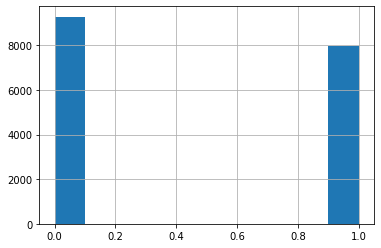

In [ ]:
target=train['Purchase Again']
target.hist()

#Adding new features

In [ ]:
  # Time features
all_data["Order Time"]= pd.to_datetime(all_data["Order Time"])
all_data["dayofweek"]= all_data["Order Time"].dt.dayofweek
all_data["hour"]= all_data["Order Time"].dt.hour
all_data["day od month"]= all_data["Order Time"].dt.day
        # Hour bins 
hour_bins = [0, 6, 11, 15, 18, 24]
dispatch_hour_bin = pd.cut(all_data.hour, hour_bins, right=False)
all_data['hour_bin'] = dispatch_hour_bin

   

In [ ]:

all_data['week-end']=np.where(np.logical_or(all_data['dayofweek']==5,all_data['dayofweek']==4),1,0)

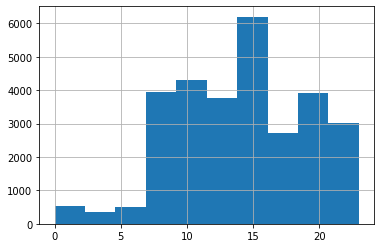

In [ ]:
all_data['hour'].hist()

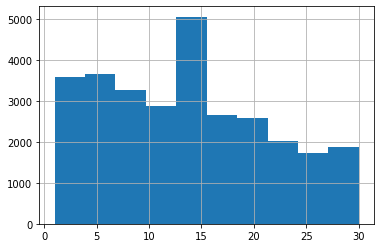

In [ ]:
all_data['day od month'].hist()

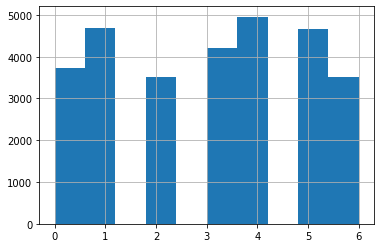

In [ ]:
all_data['dayofweek'].hist()

In [ ]:
  # Cyclicale time features
all_data['day od month sin'] = np.sin(all_data['day od month']*(2.*np.pi/31)) 
all_data['day od month cos'] = np.cos(all_data['day od month']*(2.*np.pi/31)) 
all_data['dayofweek sin'] = np.sin(all_data['dayofweek']*(2.*np.pi/7)) 
all_data['dayofweek cos'] = np.cos(all_data['dayofweek']*(2.*np.pi/7)) 
all_data['hour sin'] = np.sin(all_data['hour']*(2.*np.pi/23)) 
all_data['hour cos'] = np.cos(all_data['hour']*(2.*np.pi/23))


In [ ]:
all_data.drop('Order Time',axis=1)

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,Purchase Again,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,43650.0,200200.0,CASH_PAY,8.392354e+06,6158523,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,43650.0,200200.0,CASH_PAY,8.392354e+06,6158523,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450.0,2250.0,43650.0,200200.0,CASH_PAY,8.392354e+06,6158523,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
3,8236624,COMPLETED,Paves,Pave chocolat,3,100.0,300.0,1460.0,700700.0,CARD_PAY,6.359544e+06,17654385,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
4,8236624,COMPLETED,Tartes,Tarte citron,3,100.0,300.0,1460.0,700700.0,CARD_PAY,6.359544e+06,17654385,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12008,1395694909,REJECTED,Huiles,Elio 5l,5,600.0,3000.0,3000.0,200200.0,CASH_PAY,4.949852e+06,23255526,Algeria,NaN,6,18,14,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-9.790841e-01,0.203456
12009,3266630982,COMPLETED,NaN,Oeuf Au Chocolat Kinder Joy Boy pour GarÃ§ons ...,1,220.0,220.0,1100.0,200200.0,CARD_PAY,6.313937e+09,10586352,Algeria,NaN,6,20,14,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553
12010,3266630982,COMPLETED,NaN,Oeuf Au Chocolat Kinder Joy Girl pour Filles +...,4,220.0,880.0,1100.0,200200.0,CARD_PAY,6.313937e+09,10586352,Algeria,NaN,6,20,14,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553
12011,14338798234,REJECTED,Cartouche,Pack PG445 / CL446,1,5150.0,5150.0,5150.0,200200.0,CASH_PAY,7.734230e+06,14700945,Algeria,NaN,6,22,14,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-2.697968e-01,0.962917


In [ ]:

all_data['Unit Price'] = pd.to_numeric(all_data['Unit Price'], errors='coerce')
all_data['Total Price']=all_data['Quantity']*all_data['Unit Price']
all_data=all_data.drop('Sub Total',axis=1)
all_data=all_data.drop('Category Name',axis=1)

In [ ]:
data_joint = all_data.groupby('Order ID').agg({
    
    'Total Price': 'sum'

})

In [ ]:
data_joint['Sub Total']=data_joint['Total Price']

data_joint=data_joint.drop('Total Price',axis=1)

In [ ]:
all_data.head(-5)

,Order ID,Order Status,Product Name,Quantity,Unit Price,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos
0,8236617,DEFAULT,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,200200.0,CASH_PAY,8.392354e+06,6158523,2021-01-01 00:26:48,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
1,8236617,DEFAULT,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,200200.0,CASH_PAY,8.392354e+06,6158523,2021-01-01 00:26:48,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
2,8236617,DEFAULT,Snickers mini cube 200g,5,450.0,2250.0,200200.0,CASH_PAY,8.392354e+06,6158523,2021-01-01 00:26:48,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
3,8236624,COMPLETED,Pave chocolat,3,100.0,300.0,700700.0,CARD_PAY,6.359544e+06,17654385,2021-01-01 00:27:29,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
4,8236624,COMPLETED,Tarte citron,3,100.0,300.0,700700.0,CARD_PAY,6.359544e+06,17654385,2021-01-01 00:27:29,Algeria,1.0,4,0,1,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,23500862814,COMPLETED,Skin Detox Masque Argile Purifiant 2-en-1 - 15...,1,950.0,950.0,390390.0,CARD_PAY,4.515537e+09,19380165,2021-02-14 17:47:15,Algeria,NaN,6,17,14,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242
12004,23500862814,COMPLETED,Savon CrÃ¨me Soft - 100g - Blanc,1,174.0,174.0,390390.0,CARD_PAY,4.515537e+09,19380165,2021-02-14 17:47:15,Algeria,NaN,6,17,14,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242
12005,23500862814,COMPLETED,Bic Comfort 2 Sensitive - Lot De 6 Rasoirs Jet...,1,230.0,230.0,390390.0,CARD_PAY,4.515537e+09,19380165,2021-02-14 17:47:15,Algeria,NaN,6,17,14,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242
12006,6176711011,COMPLETED,03 Fardeaux Ifri + 1 Offert,3,480.0,1440.0,200200.0,CASH_PAY,6.296932e+06,23255526,2021-02-14 17:49:57,Algeria,NaN,6,17,14,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242


In [ ]:
data_joint

,Sub Total
Order ID,
8236617,43650.0
8236624,1460.0
8236741,4740.0
8236744,3750.0
8236772,1800.0
...,...
51088700000000,487.5
53243700000000,1200.0
69827300000000,1200.0


In [ ]:
all_data = all_data.merge(data_joint ,on='Order ID', how = 'inner')

In [ ]:
all_data=all_data.drop('Product Name',axis=1)
all_data=all_data.drop('Unit Price',axis=1)


#Feature encoding

In [ ]:
#Customer Country : Since the 'Customer Country' feature has only 0.3% missing values, we will just fill these with the most common one which is "Algeria"
common_value = 'Algeria'
data = [all_data]
for dataset in data:
    dataset['Customer Country'] = dataset['Customer Country'].fillna(common_value)

#Delivery Charge : Since the 'Delivery Charge' feature has only 0.1% missing values, we will just fill these with the most common one which is "200200"
common_value = 200200
data = [all_data]

for dataset in data:
    dataset['Delivery Charge'] = dataset['Delivery Charge'].fillna(common_value)


In [ ]:
#Payment Method : Since the 'Payment Method' feature has only 1.8% missing values, we will just fill these with the most common one which is "CARD_PAY"
common_value = 'CARD_PAY'
data=[all_data]
for dataset in data:
    dataset['Payment Method'] = dataset['Payment Method'].fillna(common_value)

In [ ]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import metrics

In [ ]:
categorical_variables = ['hour_bin','Payment Method','Order Status','Customer Country','Delivery Charge']

le = preprocessing.LabelEncoder()

for var in categorical_variables:
  categories = all_data[var]
  all_data[var] = le.fit_transform(categories)


In [ ]:
all_data['Delivery Charge'].fillna(value=200200.00,inplace=True)
all_data['Customer Country'].fillna(value=0,inplace=True)


In [ ]:
all_data=all_data.drop('Order Time',axis=1)

In [ ]:
all_data

,Order ID,Order Status,Quantity,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,Purchase Again,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Sub Total
0,8236617,3,30,14400.0,4,3,8.392354e+06,6158523,0,1.0,4,0,1,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,43650.0
1,8236617,3,15,27000.0,4,3,8.392354e+06,6158523,0,1.0,4,0,1,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,43650.0
2,8236617,3,5,2250.0,4,3,8.392354e+06,6158523,0,1.0,4,0,1,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,43650.0
3,8236624,2,3,300.0,25,1,6.359544e+06,17654385,0,1.0,4,0,1,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,1460.0
4,8236624,2,3,300.0,25,1,6.359544e+06,17654385,0,1.0,4,0,1,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,1460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271,1395694909,4,5,3000.0,4,3,4.949852e+06,23255526,0,NaN,6,18,14,4,0,0.299363,-0.954139,-0.781831,0.623490,-9.790841e-01,0.203456,3000.0
29272,3266630982,2,1,220.0,4,1,6.313937e+09,10586352,0,NaN,6,20,14,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
29273,3266630982,2,4,880.0,4,1,6.313937e+09,10586352,0,NaN,6,20,14,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
29274,14338798234,4,1,5150.0,4,3,7.734230e+06,14700945,0,NaN,6,22,14,4,0,0.299363,-0.954139,-0.781831,0.623490,-2.697968e-01,0.962917,5150.0


In [ ]:
all_data.value_counts('Order Status')

Order Status
2    24114
4     3065
0     1296
1      434
3      248
5      119
dtype: int64

In [ ]:
n_train = train.shape[0]
n_test = test.shape[0]

train_set = all_data[:n_train]
test_set = all_data[n_train:]

In [ ]:
np.shape(train_set)

(17263, 22)

In [ ]:
np.shape(test_set)

(12013, 22)

#Transforming data

In [ ]:
Customer_Table_Train = train_set.groupby('Customer ID').agg({
     'Order ID': 'count',
    'Total Price': 'sum',
})

Customer_Table_Test = test_set.groupby('Customer ID').agg({
     'Order ID': 'count',
    'Total Price': 'sum',
})

In [ ]:
Customer_Table_Train['Frequency']=Customer_Table_Train['Order ID']
Customer_Table_Test['Frequency']=Customer_Table_Test['Order ID']
Customer_Table_Train['All_money_spent']=Customer_Table_Train['Total Price']
Customer_Table_Test['All_money_spent']=Customer_Table_Test['Total Price']


In [ ]:
Customer_Table_Train

,Order ID,Total Price,Frequency,All_money_spent
Customer ID,,,,
1.629574e+06,5,1588.0,5,1588.0
1.735264e+06,1,3990.0,1,3990.0
1.755078e+06,4,2621.0,4,2621.0
1.755834e+06,30,21234.0,30,21234.0
1.756892e+06,4,1097.0,4,1097.0
...,...,...,...,...
1.573202e+11,5,7150.0,5,7150.0
2.100000e+11,38,11136.0,38,11136.0
2.320000e+11,1,2490.0,1,2490.0


In [ ]:
Customer_Table_Test

,Order ID,Total Price,Frequency,All_money_spent
Customer ID,,,,
1.786544e+06,3,31914.0,3,31914.0
1.790392e+06,6,2260.0,6,2260.0
1.792674e+06,8,8360.0,8,8360.0
1.806334e+06,4,3876.0,4,3876.0
1.814650e+06,2,1696.0,2,1696.0
...,...,...,...,...
1.122027e+11,4,5327.5,4,5327.5
1.258333e+11,42,16667.0,42,16667.0
1.100000e+12,1,996.0,1,996.0


In [ ]:
Customer_Table_Test=Customer_Table_Test.drop('Order ID',axis=1)
Customer_Table_Train=Customer_Table_Train.drop('Order ID',axis=1)
Customer_Table_Test=Customer_Table_Test.drop('Total Price',axis=1)
Customer_Table_Train=Customer_Table_Train.drop('Total Price',axis=1)

In [ ]:
Customer_Table_Test

,Frequency,All_money_spent
Customer ID,,
1.786544e+06,3,31914.0
1.790392e+06,6,2260.0
1.792674e+06,8,8360.0
1.806334e+06,4,3876.0
1.814650e+06,2,1696.0
...,...,...
1.122027e+11,4,5327.5
1.258333e+11,42,16667.0
1.100000e+12,1,996.0


#F

In [ ]:
Customer_Table_Train

,Frequency,All_money_spent
Customer ID,,
1.629574e+06,5,1588.0
1.735264e+06,1,3990.0
1.755078e+06,4,2621.0
1.755834e+06,30,21234.0
1.756892e+06,4,1097.0
...,...,...
1.573202e+11,5,7150.0
2.100000e+11,38,11136.0
2.320000e+11,1,2490.0


In [ ]:
Customer_Table_Train_2 = train_set.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'dayofweek': 'mean',
    'hour': 'mean',
    'day od month': 'mean',
    'hour_bin': 'median',
    'week-end': 'mean',
    'day od month sin': 'mean',
    'day od month cos': 'mean',
    'dayofweek sin': 'mean',
    'dayofweek cos': 'mean',
    'hour sin': 'mean',
    'hour cos': 'mean',
    'day od month sin': 'mean',
    'Payment Method' : 'mean',
    'Purchase Again' : 'max'
    
 
})

Customer_Table_Test_2 = test_set.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'dayofweek': 'mean',
    'hour': 'mean',
    'day od month': 'mean',
    'hour_bin': 'median',
    'week-end': 'mean',
    'day od month sin': 'mean',
    'day od month cos': 'mean',
    'dayofweek sin': 'mean',
    'dayofweek cos': 'mean',
    'hour sin': 'mean',
    'hour cos': 'mean',
    'Payment Method' : 'mean',
    'day od month sin': 'mean',
})

In [ ]:
Customer_Table_Train_all = Customer_Table_Train_2.merge(Customer_Table_Train ,on='Customer ID', how = 'inner')
Customer_Table_Test_all = Customer_Table_Test_2.merge(Customer_Table_Test ,on='Customer ID', how = 'inner')

In [ ]:
#Our train data transformed
Customer_Table_Train_all


,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Payment Method,Purchase Again,Frequency,All_money_spent
Customer ID,,,,,,,,,,,,,,,,
1.629574e+06,6,4.200000,12.600000,15.400000,3.0,1.000000,-0.223567,0.024862,-0.542093,-0.765279,-0.237747,-0.656293,3.000000,1.0,5,1588.0
1.735264e+06,1,3.000000,9.000000,11.000000,1.0,0.000000,0.790776,-0.612106,0.433884,-0.900969,0.631088,-0.775711,3.000000,0.0,1,3990.0
1.755078e+06,8,1.500000,11.750000,15.250000,2.0,0.000000,-0.116859,-0.617903,-0.195458,0.905872,-0.068083,-0.990686,3.000000,0.0,4,2621.0
1.755834e+06,496,3.833333,12.133333,6.266667,2.0,0.766667,0.829913,0.299224,-0.264784,-0.703293,-0.148694,-0.901509,0.766667,1.0,30,21234.0
1.756892e+06,4,4.500000,18.000000,9.000000,4.0,0.750000,0.784964,-0.209281,-0.520871,-0.519854,-0.714763,0.148530,3.000000,1.0,4,1097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.573202e+11,17,4.000000,8.000000,5.000000,1.0,1.000000,0.848644,0.528964,-0.433884,-0.900969,0.816970,-0.576680,1.000000,0.0,5,7150.0
2.100000e+11,53,4.000000,11.000000,15.000000,2.0,1.000000,0.101168,-0.994869,-0.433884,-0.900969,0.136167,-0.990686,1.000000,0.0,38,11136.0
2.320000e+11,10,1.000000,22.000000,2.000000,4.0,0.000000,0.394356,0.918958,0.781831,0.623490,-0.269797,0.962917,3.000000,0.0,1,2490.0


In [ ]:
#Our test data transformed
Customer_Table_Test_all

,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Payment Method,Frequency,All_money_spent
Customer ID,,,,,,,,,,,,,,,
1.786544e+06,106,5.000000,1.666667,6.000000,0.0,1.000000,0.937752,0.347305,-0.974928,-0.222521,0.436322,0.890585,3.0,3,31914.0
1.790392e+06,7,3.333333,7.833333,12.666667,1.0,0.833333,0.117857,-0.665803,-0.361570,-0.584141,0.837852,-0.536380,3.0,6,2260.0
1.792674e+06,40,3.500000,13.500000,12.000000,2.0,0.250000,0.285389,-0.332438,-0.330719,0.125000,-0.461421,-0.772991,3.0,8,8360.0
1.806334e+06,10,3.500000,12.250000,12.000000,1.5,0.750000,0.123881,-0.044302,-0.265216,-0.350242,0.375077,-0.295282,3.0,4,3876.0
1.814650e+06,6,2.000000,15.000000,3.000000,3.0,0.000000,0.571268,0.820763,0.974928,-0.222521,-0.816970,-0.576680,3.0,2,1696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.122027e+11,12,0.000000,10.000000,8.000000,1.0,0.000000,0.998717,-0.050649,0.000000,1.000000,0.398401,-0.917211,1.0,4,5327.5
1.258333e+11,73,4.976190,10.380952,17.833333,1.0,0.619048,0.111857,-0.556268,-0.682373,-0.174841,0.271722,-0.873980,1.0,42,16667.0
1.100000e+12,4,6.000000,14.000000,7.000000,2.0,0.000000,0.988468,0.151428,-0.781831,0.623490,-0.631088,-0.775711,3.0,1,996.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Customer_Table_Train_all[['All_money_spent']] = scaler.fit_transform(Customer_Table_Train_all[['All_money_spent']])

Customer_Table_Test_all[['All_money_spent']] = scaler.fit_transform(Customer_Table_Test_all[['All_money_spent']])

In [ ]:
Customer_Table_Test_all

,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Payment Method,Frequency,All_money_spent
Customer ID,,,,,,,,,,,,,,,
1.786544e+06,106,5.000000,1.666667,6.000000,0.0,1.000000,0.937752,0.347305,-0.974928,-0.222521,0.436322,0.890585,3.0,3,0.086241
1.790392e+06,7,3.333333,7.833333,12.666667,1.0,0.833333,0.117857,-0.665803,-0.361570,-0.584141,0.837852,-0.536380,3.0,6,0.006107
1.792674e+06,40,3.500000,13.500000,12.000000,2.0,0.250000,0.285389,-0.332438,-0.330719,0.125000,-0.461421,-0.772991,3.0,8,0.022591
1.806334e+06,10,3.500000,12.250000,12.000000,1.5,0.750000,0.123881,-0.044302,-0.265216,-0.350242,0.375077,-0.295282,3.0,4,0.010474
1.814650e+06,6,2.000000,15.000000,3.000000,3.0,0.000000,0.571268,0.820763,0.974928,-0.222521,-0.816970,-0.576680,3.0,2,0.004583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.122027e+11,12,0.000000,10.000000,8.000000,1.0,0.000000,0.998717,-0.050649,0.000000,1.000000,0.398401,-0.917211,1.0,4,0.014397
1.258333e+11,73,4.976190,10.380952,17.833333,1.0,0.619048,0.111857,-0.556268,-0.682373,-0.174841,0.271722,-0.873980,1.0,42,0.045039
1.100000e+12,4,6.000000,14.000000,7.000000,2.0,0.000000,0.988468,0.151428,-0.781831,0.623490,-0.631088,-0.775711,3.0,1,0.002691


In [ ]:
joint_MT=train_set[['Customer ID','Merchant']].drop_duplicates(keep=False)

In [ ]:
joint_MTest=test_set[['Customer ID','Merchant']].drop_duplicates(keep=False)

In [ ]:
joint_MTest.loc[joint_MTest['Customer ID']==1790392]

,Customer ID,Merchant
26648,1790392.0,8069691


In [ ]:
MAG_FR_T = joint_MT.groupby('Customer ID').agg({
    'Merchant': 'count',
})

MAG_FR_Test= test_set.groupby('Customer ID').agg({
    'Merchant': 'count',
})

In [ ]:
MAG_FR_Test

,Merchant
Customer ID,
1.786544e+06,3
1.790392e+06,6
1.792674e+06,8
1.806334e+06,4
1.814650e+06,2
...,...
1.122027e+11,4
1.258333e+11,42
1.100000e+12,1


#Some models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
X=Customer_Table_Train_all.drop('Purchase Again',axis=1)
Y=Customer_Table_Train_all['Purchase Again']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)


**KNN**

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print('train score',model.score(x_train,y_train))
print('test set ',model.score(x_test,y_test))


train score 0.7734668335419274
test set  0.725


**naive_bayes** 


In [ ]:
Model1 = GaussianNB()
Model1.fit(x_train, y_train)


GaussianNB()

In [ ]:

print('Model Train Score is : ' , Model1.score(x_train, y_train))
print('Model Test Score is : ' , Model1.score(x_test, y_test))

Model Train Score is :  0.7096370463078848
Model Test Score is :  0.74


**Logistic Regression**

In [ ]:
model2 = LogisticRegression(penalty='l2',solver='sag',max_iter=100,C=1.0,random_state=33)
model2.fit(x_train, y_train)
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , model2.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , model2.score(x_test, y_test))

LogisticRegressionModel Train Score is :  0.7133917396745932
LogisticRegressionModel Test Score is :  0.72


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


**SVC**

In [ ]:
SVCModel = SVC(kernel= 'rbf',C=1.0,gamma='auto')
SVCModel.fit(x_train, y_train)

print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))

SVCModel Train Score is :  0.9123904881101377
SVCModel Test Score is :  0.695


**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(x_train,y_train)
print('RF Train Score is : ' , model3.score(x_train, y_train))
print('RF Test Score is : ' , model3.score(x_test, y_test))

RF Train Score is :  1.0
RF Test Score is :  0.735


In [ ]:
resume_table(submission)

(       name   dtypes  missing  %missing  uniques
 0  Customer  float64        0       0.0      767
 1    Target    int64        0       0.0        1, (767, 2))

**LGBMClassifier**

In [ ]:
from lightgbm import LGBMClassifier

# You can increase the iterations parameter but it will take longer to learn
model4 = LGBMClassifier()

model4.fit(x_train, y_train)
print('LGBM Train Score is : ' , model4.score(x_train, y_train))
print('LBGM Test Score is : ' , model4.score(x_test, y_test))

LGBM Train Score is :  1.0
LBGM Test Score is :  0.715


**catboost**

In [ ]:
#  submission.Target=model4.predict(Customer_Table_Test_all)

In [ ]:
#submission.Target.hist()

In [ ]:
#submission

In [ ]:
#submission.to_csv("SampleSubmission4.csv",index=False)

In [ ]:
 pip install catboost

     |████████████████████████████████| 76.3 MB 1.1 MB/s 


In [ ]:
"""import catboost as ctb
from catboost import CatBoostClassifier
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size = 0.2, random_state = 24)
cat = CatBoostClassifier(
    iterations= 1500,
    learning_rate=0.05,
    random_state=42,
    task_type="CPU",  
    loss_function='MultiClass')
cat.fit(x_train,y_train)
"""

'import catboost as ctb\nfrom catboost import CatBoostClassifier\nx_train, x_test, y_train, y_test = train_test_split(X,Y , test_size = 0.2, random_state = 24)\ncat = CatBoostClassifier(\n    iterations= 1500,\n    learning_rate=0.05,\n    random_state=42,\n    task_type="CPU",  \n    loss_function=\'MultiClass\')\ncat.fit(x_train,y_train)\n'

In [ ]:
#submission.Target=cat.predict(Customer_Table_Test_all)

In [ ]:
#submission.Target.hist()

In [ ]:
#submission.to_csv("SampleSubmission_CATBOOST.csv",index=False)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
xgbc = XGBClassifier()
print(xgbc)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

XGBClassifier()


XGBClassifier(objective='multi:softprob')

In [ ]:
xgbc.fit(x_train, y_train)

XGBClassifier()

In [ ]:
scores = cross_val_score(xgbc, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


Mean cross-validation score: 0.72
K-fold CV average score: 0.71


In [ ]:
#submission.Target=xgbc.predict(Customer_Table_Test_all)

In [ ]:
#submission.Target.hist()

In [ ]:
#submission.to_csv("SampleSubmission_XGBBOOST.csv",index=False)

#The model for the submission
#XGBOOST MODEL 500 iterations

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgbm

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1,0.05,0.01], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=30)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=30,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(x_train, y_train,verbose = 1)

y_pred_train = grid_obj_xgb.predict(x_train)
y_pred_test = grid_obj_xgb.predict(x_test)
submission.Target =  grid_obj_xgb.predict(Customer_Table_Test_all)
err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
submission.to_csv("SampleSubmission_XGBOOST_500_iteration.csv",index=False)